# GENETIC ALGORITHM

## الگوریتم ژنتیک براي فروشنده دوره گرد

###### **Importing Required Libraries**:

In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
random.seed(42)

###### **Defining Point Class**:

In [3]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

###### Define function to calculate the distance between two points:



In [4]:
def distance(point1, point2):
    return ((point1.x - point2.x) ** 2 + (point1.y - point2.y) ** 2) ** 0.5


###### Define function to initialize points from provided data:



In [5]:
def init_points(data):
    return [Point(point["x"], point["y"]) for point in data]


###### Define function to calculate the total distance of a route:



In [6]:
def calculate_total_distance(route):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distance(route[i], route[i + 1])
    # Add distance from the last point back to the starting point
    total_distance += distance(route[-1], route[0])
    return total_distance


###### Function for crossover using Partially Mapped Crossover (PMX):



In [7]:
def crossover(parent1, parent2):
    size = len(parent1)
    start = random.randint(0, size - 1)
    end = random.randint(start + 1, size)
    child = [None] * size

    # Copy a section of the first parent to the child
    child[start:end] = parent1[start:end]

    # Map the section from the second parent to the child
    for idx in range(start, end):
        if parent2[idx] not in child:
            # Find the corresponding city from parent2
            idx2 = parent2.index(child[idx])
            while child[idx2] is not None:
                idx2 = parent2.index(child[idx2])
            child[idx2] = parent2[idx]

    # Fill in the remaining elements with cities from parent2
    for idx in range(size):
        if child[idx] is None:
            child[idx] = parent2[idx]

    return child



###### Function for mutation using Inversion Mutation:



In [8]:
def mutate(route):
    start = random.randint(0, len(route) - 1)
    end = random.randint(start + 1, len(route))
    route[start:end] = reversed(route[start:end])
    return route



###### "Defining Genetic Algorithm for Traveling Salesman Problem:

In [9]:
def genetic_algorithm(points, population_size, generations):
    """
    Applies a genetic algorithm to solve the Traveling Salesman Problem (TSP).

    Parameters:
    - points (list of Point): List of Point objects representing the cities.
    - population_size (int): The size of the population for each generation.
    - generations (int): The number of generations for which the algorithm runs.

    Returns:
    None
    """
    population = [random.sample(points, len(points)) for _ in range(population_size)]
    best_distances = []

    for generation in range(generations):
        fitness_scores = [calculate_total_distance(route) for route in population]

        # Roulette wheel selection with probabilities
        probabilities = [1 / score for score in fitness_scores]
        total_probability = sum(probabilities)
        normalized_probabilities = [prob / total_probability for prob in probabilities]

        selected_parents = [random.choices(population, weights=normalized_probabilities)[0] for _ in range(population_size)]

        # Perform crossover and mutation
        children = [crossover(parent1, parent2) for parent1, parent2 in zip(selected_parents[::2], selected_parents[1::2])]
        mutated_children = [mutate(child) for child in children]

        # Replace old population with new one
        population = selected_parents + mutated_children

        # Record best route distance in each generation
        best_distance = min(fitness_scores)
        best_distances.append(best_distance)
        print(f"Generation {generation + 1}, Best Distance: {best_distance}")

    # Plotting the evolution of the best route's distance across generations
    plt.plot(range(1, generations + 1), best_distances)
    plt.xlabel('Generation')
    plt.ylabel('Best Distance')
    plt.title('Evolution of Best Route Distance')
    plt.show()


###### "dataset: Collection of (x, y) Pairs":

In [10]:

data500 = [{"x":780,"y":560},{"x":631,"y":173},{"x":452,"y":237},{"x":789,"y":506},{"x":308,"y":175},{"x":797,"y":157},{"x":524,"y":583},{"x":241,"y":7},{"x":340,"y":105},{"x":787,"y":19},{"x":168,"y":342},{"x":685,"y":386},{"x":739,"y":195},{"x":408,"y":550},{"x":581,"y":577},{"x":762,"y":406},{"x":14,"y":370},{"x":275,"y":610},{"x":38,"y":484},{"x":699,"y":148},{"x":780,"y":272},{"x":686,"y":611},{"x":42,"y":650},{"x":257,"y":329},{"x":1,"y":260},{"x":432,"y":448},{"x":805,"y":546},{"x":268,"y":472},{"x":174,"y":154},{"x":189,"y":432},{"x":869,"y":653},{"x":371,"y":337},{"x":192,"y":279},{"x":322,"y":118},{"x":842,"y":584},{"x":809,"y":381},{"x":717,"y":250},{"x":77,"y":575},{"x":654,"y":21},{"x":859,"y":146},{"x":534,"y":561},{"x":732,"y":227},{"x":154,"y":371},{"x":263,"y":148},{"x":64,"y":524},{"x":689,"y":553},{"x":316,"y":358},{"x":587,"y":374},{"x":679,"y":125},{"x":234,"y":501},{"x":282,"y":403},{"x":671,"y":107},{"x":703,"y":347},{"x":116,"y":408},{"x":655,"y":593},{"x":120,"y":196},{"x":111,"y":240},{"x":686,"y":271},{"x":237,"y":213},{"x":463,"y":562},{"x":543,"y":240},{"x":832,"y":406},{"x":705,"y":280},{"x":359,"y":252},{"x":494,"y":575},{"x":339,"y":85},{"x":719,"y":115},{"x":709,"y":564},{"x":752,"y":178},{"x":412,"y":599},{"x":207,"y":524},{"x":812,"y":359},{"x":13,"y":500},{"x":635,"y":477},{"x":243,"y":236},{"x":400,"y":381},{"x":639,"y":551},{"x":407,"y":65},{"x":39,"y":619},{"x":508,"y":170},{"x":150,"y":115},{"x":789,"y":353},{"x":64,"y":178},{"x":831,"y":434},{"x":539,"y":83},{"x":671,"y":317},{"x":806,"y":479},{"x":383,"y":335},{"x":405,"y":103},{"x":437,"y":549},{"x":62,"y":590},{"x":589,"y":296},{"x":536,"y":539},{"x":375,"y":541},{"x":659,"y":326},{"x":582,"y":600},{"x":482,"y":73},{"x":229,"y":8},{"x":545,"y":292},{"x":537,"y":174},{"x":704,"y":273},{"x":106,"y":487},{"x":759,"y":575},{"x":460,"y":358},{"x":85,"y":6},{"x":556,"y":112},{"x":347,"y":196},{"x":856,"y":88},{"x":612,"y":395},{"x":459,"y":195},{"x":198,"y":431},{"x":102,"y":14},{"x":750,"y":403},{"x":87,"y":37},{"x":719,"y":146},{"x":353,"y":405},{"x":633,"y":476},{"x":806,"y":313},{"x":529,"y":509},{"x":772,"y":55},{"x":298,"y":527},{"x":546,"y":522},{"x":7,"y":72},{"x":118,"y":337},{"x":377,"y":216},{"x":816,"y":327},{"x":227,"y":167},{"x":715,"y":422},{"x":324,"y":516},{"x":847,"y":170},{"x":752,"y":422},{"x":657,"y":570},{"x":539,"y":450},{"x":285,"y":556},{"x":381,"y":168},{"x":317,"y":251},{"x":303,"y":197},{"x":797,"y":50},{"x":820,"y":193},{"x":739,"y":85},{"x":623,"y":118},{"x":422,"y":73},{"x":696,"y":205},{"x":534,"y":450},{"x":511,"y":263},{"x":648,"y":110},{"x":601,"y":518},{"x":111,"y":627},{"x":771,"y":572},{"x":797,"y":303},{"x":335,"y":332},{"x":344,"y":492},{"x":345,"y":610},{"x":631,"y":340},{"x":863,"y":305},{"x":363,"y":406},{"x":414,"y":14},{"x":591,"y":26},{"x":602,"y":592},{"x":386,"y":273},{"x":687,"y":183},{"x":570,"y":27},{"x":613,"y":645},{"x":58,"y":268},{"x":668,"y":375},{"x":157,"y":349},{"x":634,"y":627},{"x":575,"y":465},{"x":175,"y":460},{"x":843,"y":625},{"x":425,"y":20},{"x":54,"y":411},{"x":459,"y":659},{"x":482,"y":176},{"x":593,"y":296},{"x":854,"y":512},{"x":132,"y":551},{"x":875,"y":577},{"x":774,"y":470},{"x":95,"y":584},{"x":575,"y":614},{"x":767,"y":635},{"x":426,"y":212},{"x":796,"y":38},{"x":33,"y":147},{"x":773,"y":95},{"x":141,"y":640},{"x":831,"y":257},{"x":684,"y":175},{"x":16,"y":534},{"x":399,"y":579},{"x":729,"y":185},{"x":759,"y":217},{"x":88,"y":327},{"x":43,"y":167},{"x":38,"y":161},{"x":331,"y":405},{"x":292,"y":130},{"x":527,"y":658},{"x":57,"y":288},{"x":546,"y":479},{"x":77,"y":118},{"x":810,"y":74},{"x":668,"y":101},{"x":125,"y":570},{"x":734,"y":267},{"x":790,"y":417},{"x":784,"y":204},{"x":242,"y":335},{"x":548,"y":458},{"x":373,"y":189},{"x":88,"y":216},{"x":738,"y":1},{"x":588,"y":384},{"x":600,"y":221},{"x":161,"y":340},{"x":862,"y":400},{"x":717,"y":82},{"x":434,"y":19},{"x":367,"y":476},{"x":373,"y":288},{"x":198,"y":508},{"x":781,"y":516},{"x":410,"y":401},{"x":96,"y":377},{"x":779,"y":653},{"x":319,"y":404},{"x":680,"y":66},{"x":209,"y":381},{"x":664,"y":41},{"x":230,"y":340},{"x":650,"y":499},{"x":524,"y":604},{"x":344,"y":287},{"x":517,"y":351},{"x":4,"y":10},{"x":146,"y":233},{"x":766,"y":185},{"x":154,"y":476},{"x":153,"y":534},{"x":797,"y":278},{"x":686,"y":434},{"x":241,"y":469},{"x":8,"y":550},{"x":292,"y":118},{"x":737,"y":118},{"x":600,"y":610},{"x":134,"y":405},{"x":541,"y":96},{"x":178,"y":53},{"x":283,"y":618},{"x":227,"y":559},{"x":724,"y":264},{"x":93,"y":192},{"x":218,"y":531},{"x":279,"y":395},{"x":635,"y":430},{"x":783,"y":424},{"x":15,"y":34},{"x":106,"y":406},{"x":371,"y":277},{"x":659,"y":222},{"x":29,"y":401},{"x":27,"y":194},{"x":417,"y":657},{"x":548,"y":12},{"x":394,"y":160},{"x":727,"y":410},{"x":217,"y":459},{"x":286,"y":629},{"x":748,"y":105},{"x":679,"y":514},{"x":65,"y":487},{"x":221,"y":160},{"x":42,"y":239},{"x":822,"y":390},{"x":452,"y":291},{"x":561,"y":107},{"x":389,"y":451},{"x":317,"y":94},{"x":34,"y":50},{"x":324,"y":284},{"x":768,"y":531},{"x":678,"y":432},{"x":663,"y":411},{"x":153,"y":27},{"x":287,"y":348},{"x":444,"y":184},{"x":686,"y":482},{"x":129,"y":122},{"x":667,"y":368},{"x":263,"y":78},{"x":109,"y":190},{"x":271,"y":208},{"x":72,"y":346},{"x":582,"y":5},{"x":546,"y":343},{"x":432,"y":305},{"x":805,"y":5},{"x":329,"y":100},{"x":747,"y":304},{"x":255,"y":283},{"x":319,"y":623},{"x":602,"y":145},{"x":818,"y":582},{"x":478,"y":491},{"x":151,"y":451},{"x":628,"y":605},{"x":803,"y":260},{"x":706,"y":636},{"x":192,"y":535},{"x":342,"y":177},{"x":259,"y":599},{"x":365,"y":229},{"x":583,"y":426},{"x":340,"y":562},{"x":405,"y":629},{"x":116,"y":260},{"x":533,"y":479},{"x":411,"y":615},{"x":382,"y":125},{"x":36,"y":272},{"x":863,"y":466},{"x":600,"y":288},{"x":30,"y":648},{"x":335,"y":269},{"x":302,"y":92},{"x":607,"y":98},{"x":522,"y":101},{"x":801,"y":339},{"x":412,"y":189},{"x":776,"y":446},{"x":77,"y":528},{"x":425,"y":547},{"x":535,"y":317},{"x":802,"y":229},{"x":698,"y":534},{"x":109,"y":109},{"x":321,"y":37},{"x":232,"y":115},{"x":168,"y":621},{"x":637,"y":502},{"x":177,"y":156},{"x":66,"y":376},{"x":646,"y":329},{"x":345,"y":290},{"x":861,"y":28},{"x":791,"y":184},{"x":745,"y":244},{"x":90,"y":370},{"x":610,"y":617},{"x":592,"y":452},{"x":410,"y":500},{"x":410,"y":288},{"x":645,"y":239},{"x":278,"y":163},{"x":761,"y":27},{"x":275,"y":33},{"x":185,"y":203},{"x":794,"y":129},{"x":121,"y":421},{"x":505,"y":126},{"x":750,"y":309},{"x":222,"y":518},{"x":276,"y":272},{"x":626,"y":61},{"x":665,"y":320},{"x":379,"y":38},{"x":459,"y":357},{"x":337,"y":450},{"x":307,"y":418},{"x":867,"y":631},{"x":191,"y":272},{"x":55,"y":465},{"x":861,"y":291},{"x":465,"y":101},{"x":792,"y":81},{"x":750,"y":278},{"x":630,"y":488},{"x":382,"y":539},{"x":282,"y":527},{"x":345,"y":575},{"x":24,"y":421},{"x":810,"y":491},{"x":270,"y":356},{"x":22,"y":646},{"x":663,"y":617},{"x":861,"y":452},{"x":879,"y":409},{"x":90,"y":515},{"x":672,"y":416},{"x":331,"y":68},{"x":165,"y":570},{"x":706,"y":384},{"x":760,"y":85},{"x":235,"y":477},{"x":42,"y":451},{"x":442,"y":598},{"x":551,"y":539},{"x":334,"y":419},{"x":417,"y":656},{"x":137,"y":610},{"x":717,"y":505},{"x":56,"y":619},{"x":695,"y":527},{"x":501,"y":514},{"x":796,"y":315},{"x":322,"y":218},{"x":818,"y":215},{"x":2,"y":239},{"x":143,"y":232},{"x":240,"y":38},{"x":165,"y":277},{"x":281,"y":91},{"x":77,"y":297},{"x":477,"y":18},{"x":617,"y":407},{"x":419,"y":170},{"x":876,"y":275},{"x":159,"y":277},{"x":777,"y":104},{"x":857,"y":25},{"x":506,"y":418},{"x":800,"y":170},{"x":121,"y":625},{"x":500,"y":579},{"x":762,"y":294},{"x":428,"y":614},{"x":818,"y":584},{"x":826,"y":101},{"x":513,"y":566},{"x":719,"y":638},{"x":366,"y":121},{"x":2,"y":142},{"x":176,"y":382},{"x":220,"y":280},{"x":141,"y":210},{"x":437,"y":419},{"x":139,"y":84},{"x":581,"y":449},{"x":238,"y":485},{"x":12,"y":139},{"x":140,"y":324},{"x":127,"y":542},{"x":328,"y":314},{"x":207,"y":123},{"x":805,"y":285},{"x":4,"y":566},{"x":603,"y":592},{"x":641,"y":77},{"x":863,"y":498},{"x":201,"y":387},{"x":373,"y":357},{"x":112,"y":322},{"x":867,"y":472},{"x":381,"y":633},{"x":467,"y":234},{"x":134,"y":63},{"x":533,"y":468},{"x":6,"y":185},{"x":574,"y":362},{"x":311,"y":451},{"x":100,"y":572},{"x":318,"y":47},{"x":114,"y":650},{"x":704,"y":641},{"x":375,"y":355},{"x":693,"y":391},{"x":549,"y":154},{"x":355,"y":167},{"x":340,"y":493},{"x":17,"y":98},{"x":331,"y":179},{"x":667,"y":431},{"x":231,"y":460},{"x":335,"y":270},{"x":351,"y":0},{"x":843,"y":449},{"x":785,"y":1},{"x":306,"y":86},{"x":302,"y":496},{"x":790,"y":236},{"x":69,"y":49},{"x":732,"y":160},{"x":515,"y":73},{"x":342,"y":253},{"x":150,"y":579},{"x":126,"y":317},{"x":272,"y":432},{"x":482,"y":301},{"x":607,"y":622},{"x":158,"y":53},{"x":711,"y":480},{"x":652,"y":193},{"x":681,"y":151},{"x":828,"y":359},{"x":563,"y":71},{"x":70,"y":138},{"x":755,"y":192},{"x":636,"y":133}];




###### **Genetic Algorithm Execution**:

Generation 1, Best Distance: 195946.7107571575
Generation 2, Best Distance: 195560.8542912628
Generation 3, Best Distance: 195818.80837642663
Generation 4, Best Distance: 196734.95857902107
Generation 5, Best Distance: 195171.80914784942
Generation 6, Best Distance: 194801.12439018214
Generation 7, Best Distance: 195470.44969153916
Generation 8, Best Distance: 195470.44969153916
Generation 9, Best Distance: 194051.95117211257
Generation 10, Best Distance: 194051.95117211257


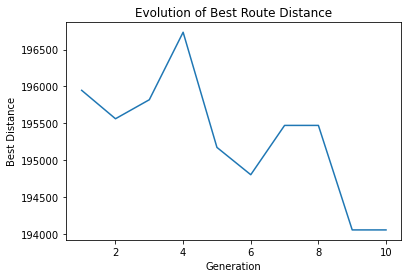

In [11]:

population_size = 100
generations = 10


genetic_algorithm(init_points(data500), population_size, generations)

## بخش امتیازی

### Crossover 


#### توضیح تابع:

1. **انتخاب نقاط تقاطع:**
   - با انتخاب دو نقطه تصادفی `start` و `end`، یک بخش تصادفی از هر والد انتخاب می‌شود.

2. **کپی بخش از والد اول به فرزند:**
   - بخش انتخاب شده از والد اول به فرزند منتقل می‌شود.

3. **Map کردن بخش از والد دوم به فرزند:**
   - برای بخش باقی‌مانده، از والد دوم استفاده شده و ارتباط مابین شهرها حفظ می‌شود.
   - اگر شهر موجود در بخش انتخاب شده از والد اول در فرزند وجود نداشته باشد، با استفاده از مکان شهر در والد دوم، مکان مناسب برای این شهر در فرزند پیدا می‌شود.

4. **تکمیل بقیه فرزند با شهرهای والد دوم:**
   - بخش باقی‌مانده از فرزند با شهرهای والد دوم پر می‌شود.

#### انتخاب PMX:
- این روش یک تعادل خوب بین حفظ بخش‌های از والدین و ایجاد تنوع در جمعیت فرزندان فراهم می‌کند. این ویژگی مهم برای جلوگیری از همگرایی زودهنگام است و از خطاهای محدودی برخوردار است.


### Mutation 


#### توضیح تابع:

1. **انتخاب بخش تصادفی جهت معکوس کردن:**
   - با انتخاب دو نقطه تصادفی `start` و `end`، یک بخش تصادفی از مسیر انتخاب می‌شود.

2. **معکوس کردن شهرها در بخش انتخاب شده:**
   - شهرها در بخش انتخاب شده معکوس می‌شوند.

#### انتخاب Inversion Mutation:
- این روش به عنوان یک تغییر کوچک و مؤثر بر روی جمعیت، اکسپلوریشن موثری فراهم می‌کند و از گیر کردن در مینیمم‌های محلی جلوگیری می‌کند.

###  نتیجه:
- این توابع با توجه به انتخاب‌های بهینه برای Crossover و Mutation به عنوان(Partially Mapped Crossover (PMX و  Inversion Mutation, بهبود کارایی و همگرایی الگوریتم ژنتیک برای مسئله TSP را تضمین می‌کنند.

### چگونگی تأثیر بر کارایی الگوریتم:

- **Crossover:** استفاده از PMX بهتر است زیرا از تنوع خوبی در جمعیت برخوردار است.
  
- **Mutation:**  به عنوان یک تغییر کوچک و مؤثر بر روی جمعیت، می‌تواند بهبود در کارایی الگوریتم به ویژه در جلوگیری از گیر کردن در مینیمم‌های محلی ایجاد کند.

